In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_df= pd.read_csv(mouse_drug_data_to_load)
ct_df=pd.read_csv(clinical_trial_data_to_load)

In [3]:
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [4]:
ct_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset

df_complete= ct_df.merge(mouse_df,how='outer',on='Mouse ID')

In [6]:
# Display the data table for preview
df_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [7]:
tumor_response=df_complete[['Drug','Timepoint','Tumor Volume (mm3)']]

In [8]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

avg_tumor_vol=pd.DataFrame(tumor_response.groupby(['Drug','Timepoint']).mean())
avg_tumor_vol.reset_index(inplace=True)
avg_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [9]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame

sem_tumor_vol=pd.DataFrame(tumor_response.groupby(['Drug','Timepoint']).sem())
sem_tumor_vol.reset_index(inplace=True)
sem_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
avg_tumor_pvt=avg_tumor_vol.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
avg_tumor_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [11]:
sem_tumor_pvt=sem_tumor_vol.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
sem_tumor_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


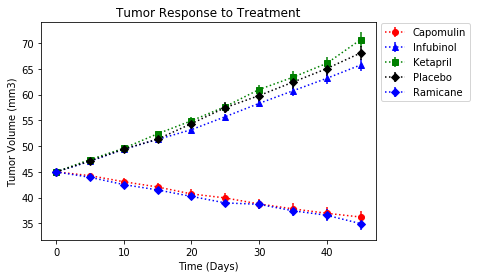

In [39]:
# Generate the Plot (with Error Bars)
plt.errorbar(avg_tumor_pvt.index,avg_tumor_pvt['Capomulin'],yerr=sem_tumor_pvt['Capomulin'],linestyle=':',marker='o',color='r')
plt.errorbar(avg_tumor_pvt.index,avg_tumor_pvt['Infubinol'],yerr=sem_tumor_pvt['Infubinol'],linestyle=':',marker='^',color='b')
plt.errorbar(avg_tumor_pvt.index,avg_tumor_pvt['Ketapril'],yerr=sem_tumor_pvt['Ketapril'],linestyle=':',marker='s',color='g')
plt.errorbar(avg_tumor_pvt.index,avg_tumor_pvt['Placebo'],yerr=sem_tumor_pvt['Placebo'],linestyle=':',marker='D',color='k')
plt.errorbar(avg_tumor_pvt.index,avg_tumor_pvt['Ramicane'],yerr=sem_tumor_pvt['Ramicane'],linestyle=':',marker='D',color='b')
#Create Legend
plt.legend(loc='upper left',bbox_to_anchor=(1, .52, 0.5, 0.5))
plt.title('Tumor Response to Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Time (Days)')

# Save the Figure

plt.savefig('Tumor Response to Treatment.png')

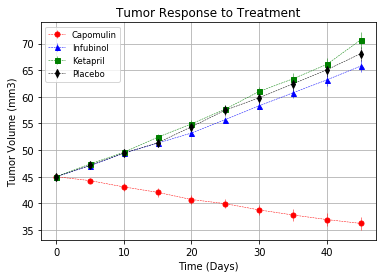

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [14]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
avg_met_df=pd.DataFrame(df_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean())

# Preview DataFrame
avg_met_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

sem_met_df=pd.DataFrame(df_complete.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem())

# Convert to DataFrame

# Preview DataFrame
sem_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [16]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
avg_met_df.reset_index(inplace=True)
avg_met_pvt=avg_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
avg_met_pvt.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [17]:
sem_met_df.reset_index(inplace=True)
sem_met_pvt=sem_met_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
sem_met_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


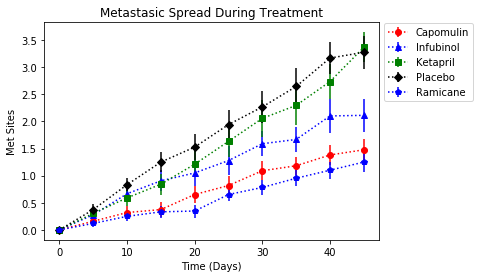

<Figure size 432x288 with 0 Axes>

In [37]:
# Generate the Plot (with Error Bars)

plt.errorbar(avg_met_pvt.index,avg_met_pvt['Capomulin'],yerr=sem_met_pvt['Capomulin'],linestyle=':',marker='o',color='r')
plt.errorbar(avg_met_pvt.index,avg_met_pvt['Infubinol'],yerr=sem_met_pvt['Infubinol'],linestyle=':',marker='^',color='b')
plt.errorbar(avg_met_pvt.index,avg_met_pvt['Ketapril'],yerr=sem_met_pvt['Ketapril'],linestyle=':',marker='s',color='g')
plt.errorbar(avg_met_pvt.index,avg_met_pvt['Placebo'],yerr=sem_met_pvt['Placebo'],linestyle=':',marker='D',color='k')
plt.errorbar(avg_met_pvt.index,avg_met_pvt['Ramicane'],yerr=sem_met_pvt['Ramicane'],linestyle=':',marker='p',color='b')
# Create Legend
plt.legend(loc='upper left',bbox_to_anchor=(1, .52, 0.5, 0.5))
plt.title('Metastasic Spread During Treatment')
plt.ylabel('Met Sites')
plt.xlabel('Time (Days)')

# Show Figure
plt.show()

#Save figure
plt.savefig('Tumor Response to Treatment.png')

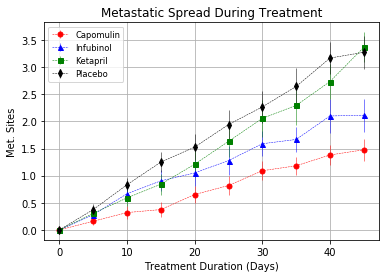

## Survival Rates

In [19]:
df_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [20]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
avg_surv_df=pd.DataFrame(df_complete.groupby(['Drug','Timepoint'])['Mouse ID'].count())
avg_surv_df.reset_index(inplace=True)
avg_surv_df.rename(columns={'Mouse ID':'Mouse Count'},inplace=True)
# Preview DataFrame
avg_surv_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [21]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
avg_surv_pvt=avg_surv_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
avg_surv_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


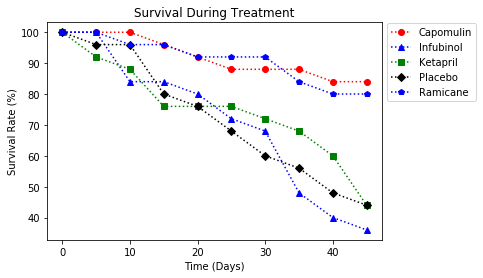

In [36]:
# Generate the Plot (Accounting for percentages)
plt.errorbar(avg_surv_pvt.index,(avg_surv_pvt['Capomulin']/avg_surv_pvt['Capomulin'].max())*100,linestyle=':',marker='o',color='r')
plt.errorbar(avg_surv_pvt.index,(avg_surv_pvt['Infubinol']/avg_surv_pvt['Infubinol'].max())*100,linestyle=':',marker='^',color='b')
plt.errorbar(avg_surv_pvt.index,(avg_surv_pvt['Ketapril']/avg_surv_pvt['Ketapril'].max())*100,linestyle=':',marker='s',color='g')
plt.errorbar(avg_surv_pvt.index,(avg_surv_pvt['Placebo']/avg_surv_pvt['Placebo'].max())*100,linestyle=':',marker='D',color='k')
plt.errorbar(avg_surv_pvt.index,(avg_surv_pvt['Ramicane']/avg_surv_pvt['Ramicane'].max())*100,linestyle=':',marker='p',color='b')
#Crate Legend

plt.legend(loc='upper left',bbox_to_anchor=(1, .52, 0.5, 0.5))
plt.title('Survival During Treatment')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')

# Save the Figure
plt.savefig('Survival During Treatment.png')

# Show the Figure
plt.show()

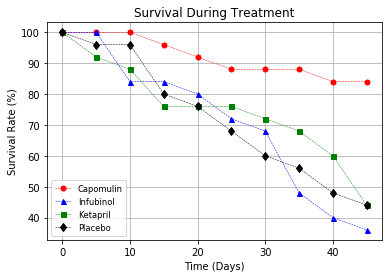

## Summary Bar Graph

In [24]:
df_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [25]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
avg_tumor_pvt=avg_tumor_vol.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
avg_tumor_pvt.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [27]:
# Calculate the percent changes for each drug
# Display the data to confirm

100*(avg_tumor_pvt[avg_tumor_pvt.columns].iloc[-1]/avg_tumor_pvt[avg_tumor_pvt.columns].iloc[0]-1)

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

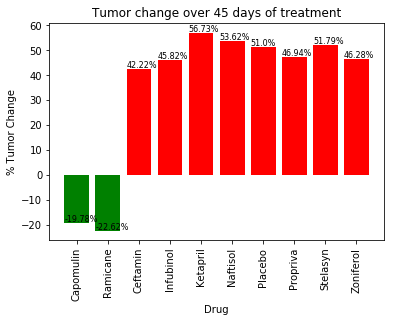

In [34]:
# Store all Relevant Percent Changes into a Tuple

drug_performance=pd.DataFrame(100*(avg_tumor_pvt[avg_tumor_pvt.columns].iloc[-1]/avg_tumor_pvt[avg_tumor_pvt.columns].iloc[0]-1),columns=['%Tumor Volume Change'])


# Splice the data between passing and failing drugs
passing=drug_performance.loc[drug_performance['%Tumor Volume Change']<=0]
failing=drug_performance.loc[drug_performance['%Tumor Volume Change']>0]

# Orient widths. Add labels, tick marks, etc. 

fig, ax = plt.subplots()

ax.bar(passing.index,passing['%Tumor Volume Change'],color='g',align='center')
ax.bar(failing.index,failing['%Tumor Volume Change'],color='r',align='center')

plt.xticks(rotation=90)

plt.title('Tumor change over 45 days of treatment')

plt.ylabel('% Tumor Change')
plt.xlabel('Drug')
# Use functions to label the percentages of changes

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x(), i.get_height()+.5, \
            str(round((i.get_height()-.3), 2))+'%', fontsize=8,
                color='black')


# Save the Figure

plt.savefig('Tumor Change by Drug.png')
# Show the Figure


Conclusions:

With the information provided the recomended Treatment is RAMICANE:

This drug outperformed in relevant indicators:

Has a similar response as Capomulin, but outperforms in the metastasi spread, and also has a similar survival as its closest competitor.Also has the largest tumor decrease

In [132]:
failing.head()

,%Tumor Volume Change
Drug,
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960


In [127]:
drug_performance.head(10)

,%Tumor Volume Change,Outcome
Drug,,
Capomulin,-19.475303,Pass
Ceftamin,42.516492,Fail
Infubinol,46.123472,Fail
Ketapril,57.028795,Fail
Naftisol,53.923347,Fail
Placebo,51.297960,Fail
Propriva,47.241175,Fail
Ramicane,-22.320900,Pass
Stelasyn,52.085134,Fail


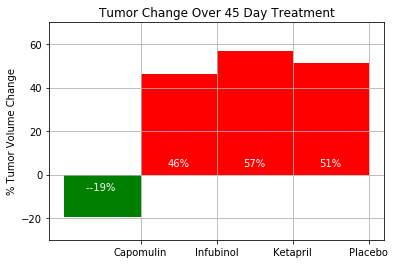